# Drift

Machine Learning models are usually trained on historical data under the assumption that future data will look similar. However, this is not always the case.

Model **drift** describes the model's performance declining over time due to changes in data. It can be caused by changes in:

- input data distributions

- relationships between inputs and outputs

- the target (label) distribution

Drift means the model's original assumptions no longer hold. It is almost unavoidable in real-world ML.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

train_data = np.random.normal(loc=0.0, scale=1.0, size=1000)
drift_data = np.random.normal(loc=0.8, scale=1.2, size=1000)

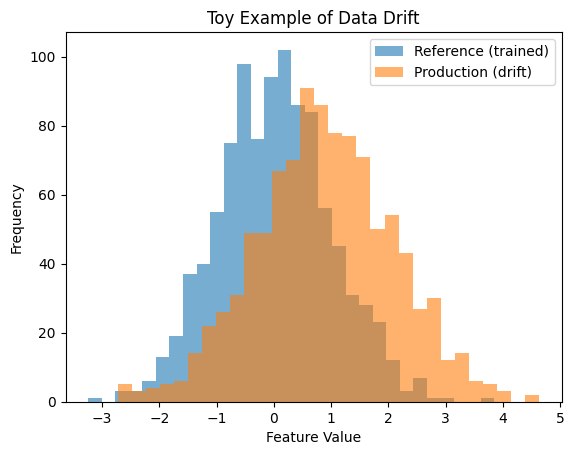

In [4]:
plt.hist(train_data, bins=30, alpha=0.6, label="Reference (trained)")
plt.hist(drift_data, bins=30, alpha=0.6, label="Production (drift)")
plt.legend()
plt.title("Toy Example of Data Drift")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()

### Measuring Drift:

#### Comparing statistics like mean and standard deviation:

In [9]:
def summary_stats(x):
    return {
        "mean": np.mean(x),
        "std": np.std(x),
        "min": np.min(x),
        "max": np.max(x)
    }

pd.DataFrame(
    [summary_stats(train_data), summary_stats(drift_data)],
    index=["Reference", "Production"]
)

,mean,std,min,max
Reference,0.019332,0.978726,-3.241267,3.852731
Production,0.885003,1.196347,-2.728466,4.631729


#### Kolmogorov-Smirnov Test:

Tests whether the samples came from the same distribution. Low p-value is statisically significant drift.

In [15]:
from scipy.stats import ks_2samp

_, p_value = ks_2samp(train_data, drift_data)
print(p_value)

1.0617870216507167e-50


#### Model Performance:

Seeing the models performance metrics (examples: regression: RMSE, classification: accuracy) drop over time is the best sign of drift.

### Dealing with Drift

Once drift is detected, retraining is a common response, but how and when matters.

**Scheduled retraining**

- Retrain on a fixed cadence (e.g., weekly, monthly)

- Simple and predictable

- May retrain unnecessarily when data is stable

**Triggered retraining**

- Retrain only when drift or performance degradation is detected

- More efficient but requires reliable monitoring

**Sliding window retraining**

- Train using only the most recent data

- Helps adapt to changing environments

- Risk: forgetting rare but important patterns

In practice, many systems combine these approaches.